In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [4]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [5]:
#Find Old Town Road
OTR = bb100[bb100['SongID']=='Old Town RoadLil Nas X Featuring Billy Ray Cyrus']

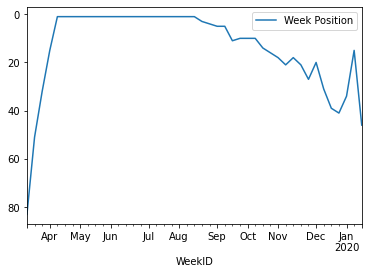

In [6]:
#Check The Record
OTR_rec = OTR[['WeekID', 'Week Position']]
OTR_rec = OTR.sort_values(by='WeekID')
OTR_rec.plot.line(x='WeekID', y='Week Position')
plt.gca().invert_yaxis()

In [7]:
OTR_feat = pd.merge(OTR, features, on='SongID', how='left')
keep = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence']
df = OTR_feat.iloc[[0]][keep]
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.878,0.619,0.102,0.0533,0.0,0.113,0.639


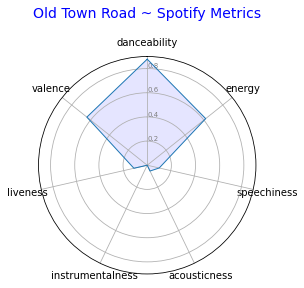

In [8]:
from math import pi
 
# number of variable
categories=list(df)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,0.9)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Old Town Road")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=df.loc[1].drop('Group').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="The Rest")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='lower left', bbox_to_anchor=(0.9, 0.08))

# Show the graph
plt.title('Old Town Road ~ Spotify Metrics', color='b', pad=20, fontsize=14)
plt.show()

In [9]:
values=df.loc[0].values.flatten().tolist()
values

[0.878, 0.619, 0.102, 0.0533, 0.0, 0.113, 0.639]